In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install --proxy 10.24.19.83:8080 pandas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#         for filename in filenames:
#             print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import PIL
print('Pillow Version:', PIL.__version__)

from PIL import Image

Pillow Version: 9.4.0


uint8
(499, 381, 3)


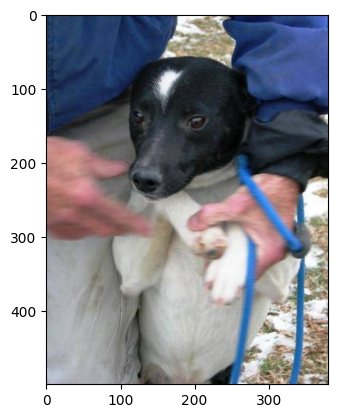

In [3]:
!pip install --proxy 10.24.19.83:8080 matplotlib
from matplotlib import image
from matplotlib import pyplot
data = image.imread('C:/Users/A200204470/OneDrive - Deutsche Telekom AG/Dokumente/Desktop/imagenet/imageNetproj/notebook/1.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
#import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [5]:
plt.figure(figsize=(20,20))
test_folder=r'C:/Users/A200204470/OneDrive - Deutsche Telekom AG/Dokumente/Desktop/imagenet/imageNetproj/notebook/8.jpg'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    print(img.shape)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/A200204470/OneDrive - Deutsche Telekom AG/Dokumente/Desktop/imagenet/imageNetproj/notebook/8.jpg'

<Figure size 2000x2000 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/cat-and-dog/training_set/training_set/dogs'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

## **Data Ingestion**
now we need to create a function which takes goes into our directory, goes into the folders and transforms our images into a dataframe of required shape and size for keras to work its magic on

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder='/kaggle/input/cat-and-dog/training_set/training_set/'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
    
    for dir1 in os.listdir(img_folder):
        print("Collecting images for: ",dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            try:
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            except:
                break
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset('/kaggle/input/cat-and-dog/training_set/training_set/')

In [ ]:
img_data=np.array(img_data)
class_name=np.array(class_name)
img_data.shape

In [ ]:
def dog_cat_mapping(a):
    if a=="dogs":
        return 1
    else:return 0
class_name=list(map(dog_cat_mapping,class_name))
class_name=np.array(class_name)

In [ ]:
input_shape=img_data.shape[1:]
input_shape

In [ ]:
def model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    model=Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
    model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [ ]:
model=model()
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x=img_data,y=class_name, epochs=10)

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder='/kaggle/input/cat-and-dog/test_set/test_set/'


# extract the image array and class name
img_data_test, class_name_test =create_dataset('/kaggle/input/cat-and-dog/test_set/test_set/')

In [ ]:
img_data_test=np.array(img_data_test)
class_name_test=list(map(dog_cat_mapping,class_name_test))
class_name_test=np.array(class_name_test)

In [ ]:
preds=model.predict(img_data_test).round().astype(int)

In [ ]:
flat_pred = [item for sublist in preds for item in sublist]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(class_name_test, flat_pred)
print("The Accuracy is: %2f" % accuracy)

In [ ]:
model.save_weights('model_wieghts_catdog.h5')
model.save('model_keras_catdog.h5')

In [ ]:
plt.imshow(img_data_test[10])

In [ ]:
model.save('/catdog')

# TODO:
#     Post the content on streamlit to create a web application
#     check for catdog